# Import Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score,recall_score,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Load Dataset

In [3]:
df = pd.read_csv('mountains_vs_beaches_preferences.csv')
df.head()

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     52444 non-null  int64 
 1   Gender                  52444 non-null  object
 2   Income                  52444 non-null  int64 
 3   Education_Level         52444 non-null  object
 4   Travel_Frequency        52444 non-null  int64 
 5   Preferred_Activities    52444 non-null  object
 6   Vacation_Budget         52444 non-null  int64 
 7   Location                52444 non-null  object
 8   Proximity_to_Mountains  52444 non-null  int64 
 9   Proximity_to_Beaches    52444 non-null  int64 
 10  Favorite_Season         52444 non-null  object
 11  Pets                    52444 non-null  int64 
 12  Environmental_Concerns  52444 non-null  int64 
 13  Preference              52444 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


# Data Preprocessing

In [5]:
duplicates = df[df.duplicated()]
print(f"Total duplicate rows: {len(duplicates)}")
print("First 10 duplicate rows:\n", duplicates.head(10))
df.drop_duplicates(inplace=True)

Total duplicate rows: 0
First 10 duplicate rows:
 Empty DataFrame
Columns: [Age, Gender, Income, Education_Level, Travel_Frequency, Preferred_Activities, Vacation_Budget, Location, Proximity_to_Mountains, Proximity_to_Beaches, Favorite_Season, Pets, Environmental_Concerns, Preference]
Index: []


In [6]:
df.dropna()
df

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56,male,71477,bachelor,9,skiing,2477,urban,175,267,summer,0,1,1
1,69,male,88740,master,1,swimming,4777,suburban,228,190,fall,0,1,0
2,46,female,46562,master,0,skiing,1469,urban,71,280,winter,0,0,1
3,32,non-binary,99044,high school,6,hiking,1482,rural,31,255,summer,1,0,1
4,60,female,106583,high school,5,sunbathing,516,suburban,23,151,winter,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67,female,85325,master,3,hiking,1762,suburban,51,262,fall,1,0,1
52440,37,female,110346,bachelor,7,swimming,1676,urban,259,84,spring,1,0,0
52441,53,non-binary,71080,doctorate,7,swimming,3877,urban,164,27,fall,0,1,0
52442,40,female,75174,doctorate,9,swimming,4620,suburban,173,10,summer,0,1,0


In [7]:
class Encoder(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.lst_drop_columns = ['Gender','Education_Level','Preferred_Activities','Location','Favorite_Season']
        
    def fit(self,X,y=None):
    
        return self
    def transform(self,X,y=None):
        X_ = X.copy()
        # using labelencoder for tranforming the categorical variable into numerical
        merge_lst = [
            X_,
            pd.get_dummies(X_).astype(int)
        ]
        X_ = pd.concat(merge_lst,axis=1)
        X_.drop(self.lst_drop_columns,axis=1,inplace = True)
        return X_

# EDA - Exploratory Data Analysis

C:\Users\s\AppData\Local\Temp\ipykernel_11724\3607737003.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Preference"], palette=["#3498db", "#e74c3c"])


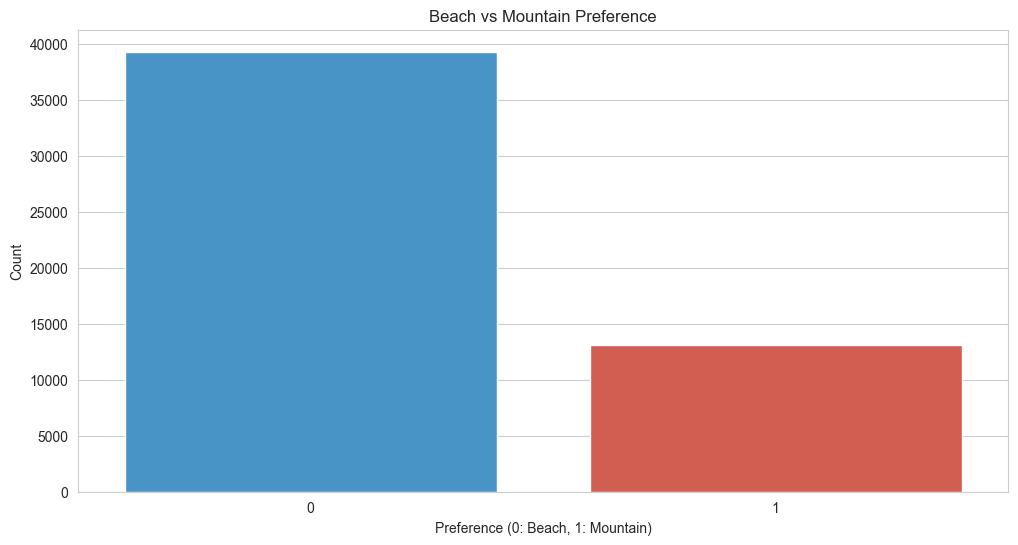

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Figure size
plt.figure(figsize=(12, 6))

# Count plot for preference (target variable)
sns.countplot(x=df["Preference"], palette=["#3498db", "#e74c3c"])
plt.title("Beach vs Mountain Preference")
plt.xlabel("Preference (0: Beach, 1: Mountain)")
plt.ylabel("Count")
plt.show()

C:\Users\s\AppData\Local\Temp\ipykernel_11724\548322394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Preference", y="Income", data=df, palette=["#3498db", "#e74c3c"])


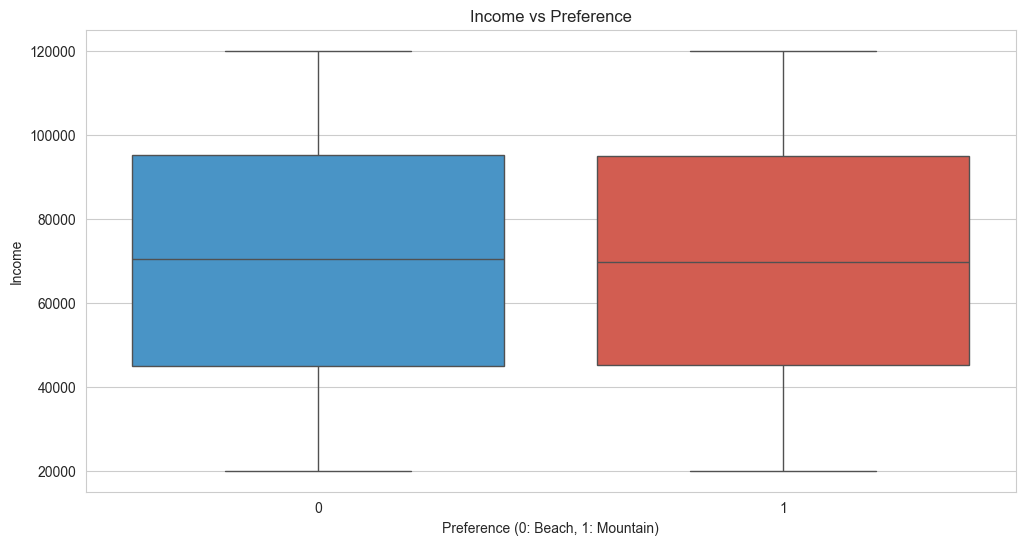

In [17]:
# Boxplot for Income vs Preference
plt.figure(figsize=(12, 6))
sns.boxplot(x="Preference", y="Income", data=df, palette=["#3498db", "#e74c3c"])
plt.title("Income vs Preference")
plt.xlabel("Preference (0: Beach, 1: Mountain)")
plt.ylabel("Income")
plt.show()

C:\Users\s\AppData\Local\Temp\ipykernel_11724\1871333558.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Preference", y="Travel_Frequency", data=df, palette=["#3498db", "#e74c3c"])


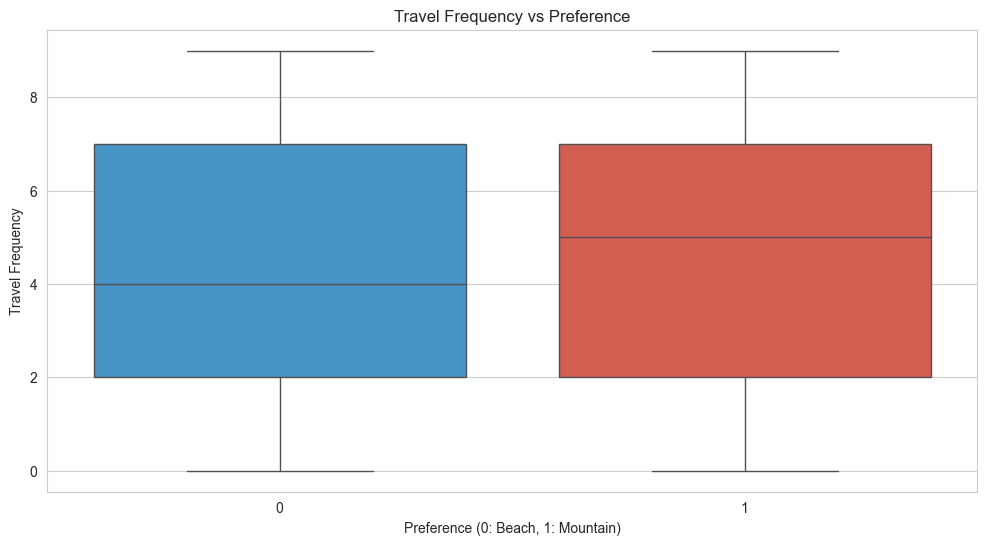

In [18]:
# Travel Frequency distribution based on preference
plt.figure(figsize=(12, 6))
sns.boxplot(x="Preference", y="Travel_Frequency", data=df, palette=["#3498db", "#e74c3c"])
plt.title("Travel Frequency vs Preference")
plt.xlabel("Preference (0: Beach, 1: Mountain)")
plt.ylabel("Travel Frequency")
plt.show()

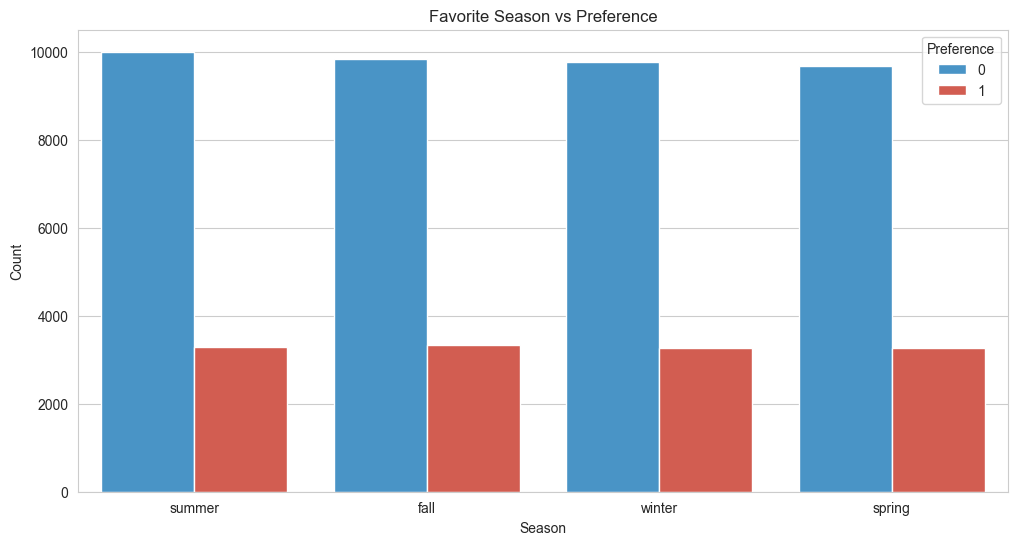

In [19]:
# Count plot for Favorite Season
plt.figure(figsize=(12, 6))
sns.countplot(x="Favorite_Season", hue="Preference", data=df, palette=["#3498db", "#e74c3c"])
plt.title("Favorite Season vs Preference")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()

# Model Training

In [8]:
X = df.drop(['Preference'],axis=1)
y = df['Preference']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
X_train.shape

(41955, 13)

In [ ]:
encoder = Encoder()
knn_pipeline1 = Pipeline([
    ('encoder',Encoder()),
    ('knn',KNeighborsClassifier(n_neighbors=5))
])

In [11]:
knn_pipeline1.fit(X_train,y_train)
y_pred = knn_pipeline1.predict(X_test)
print(f'the accuracy without standard scaler of knn is {accuracy_score(y_test,y_pred)}')

the accuracy without standard scaler of knn is 0.7247592716178854


In [12]:
knn_pipeline2 = Pipeline([
    ('encoder',Encoder()),
    ('Standard',StandardScaler()),
    ('knn',KNeighborsClassifier(n_neighbors=5))
])

knn_pipeline2.fit(X_train,y_train)
y_pred = knn_pipeline2.predict(X_test)
print(f'the accuracy with standard scaler of knn is {accuracy_score(y_test,y_pred)}')

the accuracy with standard scaler of knn is 0.9165792735246449


In [13]:
logistic_pipeline1 = Pipeline([
    ('encoder',Encoder()),
    ('LogisticReg',LogisticRegression(penalty='l2'))
])
logistic_pipeline1.fit(X_train,y_train)
y_pred = logistic_pipeline1.predict(X_test)
print(f'the accuracy without standard scaler of Logistic is {accuracy_score(y_test,y_pred)}')
print(f'the precison without standard scaler of Logistic is {precision_score(y_test,y_pred)}')
print(f'the recall without standard scaler of Logistic is {recall_score(y_test,y_pred)}')

the accuracy without standard scaler of Logistic is 0.7750023834493278
the precison without standard scaler of Logistic is 0.5738666666666666
the recall without standard scaler of Logistic is 0.40803943875616233


C:\Users\s\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
logistic_pipeline2 = Pipeline([
    ('encoder',Encoder()),
    ('Standard',StandardScaler()),
    ('LogisticReg',LogisticRegression(penalty='l2'))
])
logistic_pipeline2.fit(X_train,y_train)
y_pred = logistic_pipeline2.predict(X_test)
print(f'the accuracy with standard scaler of Logistic is {accuracy_score(y_test,y_pred)}')
print(f'the precison with standard scaler of Logistic is {precision_score(y_test,y_pred)}')
print(f'the recall with standard scaler of Logistic is {recall_score(y_test,y_pred)}')

the accuracy with standard scaler of Logistic is 0.9986652683763944
the precison with standard scaler of Logistic is 0.9992386752950133
the recall with standard scaler of Logistic is 0.9954493742889647
